In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
df = pd.read_csv('amazon_sales_data 2025.csv')  # Replace with your actual filename
df.head()


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [6]:
# Check data types and nulls
df.info()
df.isnull().sum()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")

# Standardize text columns (optional)
df['Status'] = df['Status'].str.title()
df['Payment Method'] = df['Payment Method'].str.title()
df['Category'] = df['Category'].str.title()

# Verify 'Total Sales'
df['Computed Total Sales'] = df['Price'] * df['Quantity']
mismatch = df[df['Total Sales'] != df['Computed Total Sales']]
print("Mismatch in Total Sales calculation:", len(mismatch))

# Drop the computed column after check
df.drop(columns=['Computed Total Sales'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    object        
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    object        
 3   Category           250 non-null    object        
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    object        
 8   Customer Location  250 non-null    object        
 9   Payment Method     250 non-null    object        
 10  Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.6+ KB
Mismatch in Total Sales calculation: 0


In [7]:
print("Summary:")
print(df.describe(include='all'))

print("\nUnique Categories:", df['Category'].unique())
print("Unique Payment Methods:", df['Payment Method'].unique())


Summary:
       Order ID                        Date     Product     Category  \
count       250                         250         250          250   
unique      250                         NaN          10            5   
top     ORD0001                         NaN  Smartphone  Electronics   
freq          1                         NaN          35          118   
mean        NaN  2025-04-18 05:51:21.600000         NaN          NaN   
min         NaN         2025-01-03 00:00:00         NaN          NaN   
25%         NaN         2025-02-24 00:00:00         NaN          NaN   
50%         NaN         2025-03-19 00:00:00         NaN          NaN   
75%         NaN         2025-05-02 18:00:00         NaN          NaN   
max         NaN         2025-12-03 00:00:00         NaN          NaN   
std         NaN                         NaN         NaN          NaN   

              Price    Quantity  Total Sales Customer Name Customer Location  \
count    250.000000  250.000000   250.000000  

In [8]:
df.isnull().sum()  # Shows how many NaNs in each column


,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [9]:
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-05-03,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,2025-08-03,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


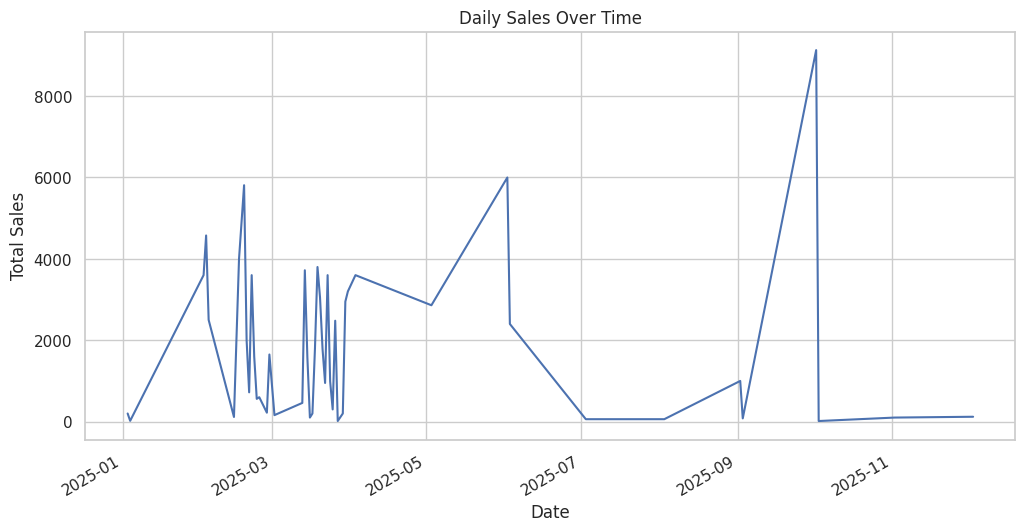

In [10]:
sales_trend = df[df['Status'] == 'Completed'].groupby('Date')['Total Sales'].sum()
sales_trend.plot(figsize=(12,6), title='Daily Sales Over Time', ylabel='Total Sales')
plt.show()


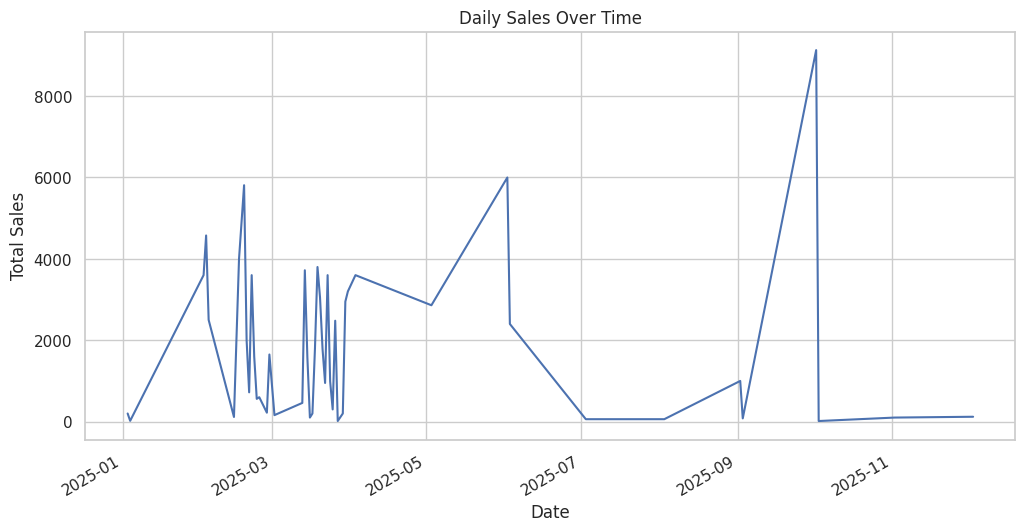

In [11]:
import plotly.express as px
import plotly.graph_objects as go
ales_trend = df[df['Status'] == 'Completed'].groupby('Date')['Total Sales'].sum()
sales_trend.plot(figsize=(12,6), title='Daily Sales Over Time', ylabel='Total Sales')
plt.show()


In [12]:
# Only use Completed orders
completed_df = df[df['Status'] == 'Completed']

# Group by Date
daily_sales = completed_df.groupby('Date')['Total Sales'].sum().reset_index()

fig = px.line(daily_sales, x='Date', y='Total Sales',
              title='Daily Sales Trend',
              markers=True)

fig.update_traces(hovertemplate='Date: %{x}<br>Total Sales: $%{y}')
fig.show()


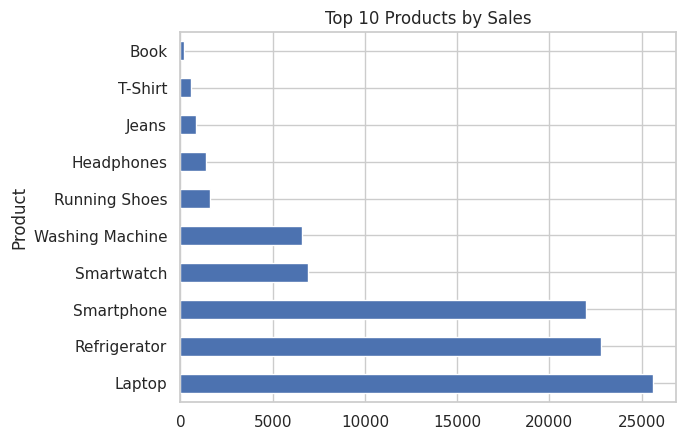

In [13]:
top_products = df[df['Status'] == 'Completed'].groupby('Product')['Total Sales'].sum().nlargest(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.show()


In [14]:
import plotly.express as px

# Filter only completed orders
completed_df = df[df['Status'] == 'Completed']

# Group by product and sum the sales
top_products = completed_df.groupby('Product')['Total Sales'].sum().nlargest(10).reset_index()

# Plot
fig = px.bar(top_products,
             x='Product',
             y='Total Sales',
             title='Top 10 Selling Products by Total Sales',
             text='Total Sales',
             color='Total Sales',
             color_continuous_scale='Blues')

fig.update_traces(texttemplate='$%{text}', textposition='outside',
                  hovertemplate='Product: %{x}<br>Total Sales: $%{y}')
fig.update_layout(xaxis_title='Product', yaxis_title='Total Sales',
                  uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()


In [17]:
# Filter for completed orders
completed_df = df[df['Status'] == 'Completed']

# Group by category
category_summary = completed_df.groupby('Category').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

category_summary = category_summary.sort_values(by='Total Sales', ascending=False)
category_summary


,Category,Total Sales,Quantity
2,Electronics,55900,136
4,Home Appliances,29400,30
3,Footwear,1620,27
1,Clothing,1400,49
0,Books,210,14


In [18]:
import plotly.express as px

fig = px.bar(category_summary,
             x='Category',
             y='Total Sales',
             title='Total Sales by Product Category',
             text='Total Sales',
             color='Total Sales',
             color_continuous_scale='Viridis')

fig.update_traces(texttemplate='$%{text}', textposition='outside',
                  hovertemplate='Category: %{x}<br>Total Sales: $%{y}')
fig.update_layout(xaxis_title='Category', yaxis_title='Total Sales')

fig.show()


In [19]:
# Filter for Completed orders only
completed_df = df[df['Status'] == 'Completed']

# Count orders by payment method
payment_summary = completed_df['Payment Method'].value_counts().reset_index()
payment_summary.columns = ['Payment Method', 'Count']
payment_summary


,Payment Method,Count
0,Paypal,30
1,Amazon Pay,21
2,Credit Card,17
3,Debit Card,14
4,Gift Card,6


In [20]:
import plotly.express as px

fig = px.bar(payment_summary,
             x='Payment Method',
             y='Count',
             title='Distribution of Payment Methods',
             text='Count',
             color='Count',
             color_continuous_scale='Tealgrn')

fig.update_traces(texttemplate='%{text}', textposition='outside',
                  hovertemplate='Payment Method: %{x}<br>Count: %{y}')
fig.update_layout(xaxis_title='Payment Method', yaxis_title='Number of Orders')

fig.show()


# New Section